In [1]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.model_selection import  train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
X, y = make_blobs(n_samples = 1000, centers=5, random_state=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

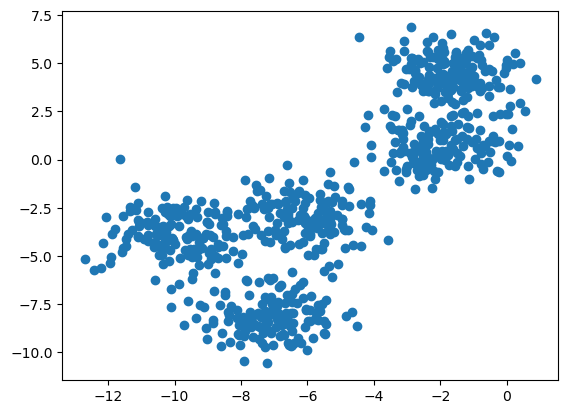

In [4]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

In [5]:
df_concat = pd.DataFrame(np.hstack([X_train,np.expand_dims(y_train,axis=1)]), columns=["x","y","class"])

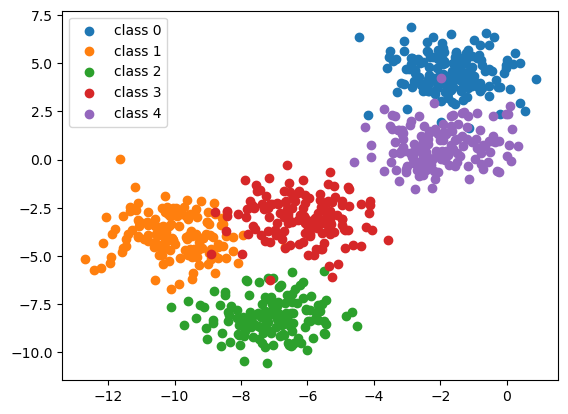

In [6]:
for i in sorted(df_concat["class"].unique().astype(int)):
    plt.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i))
plt.legend()

In [7]:
k = 5 
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=5)

In [8]:
y_hat_test = kmeans.predict(X_test)

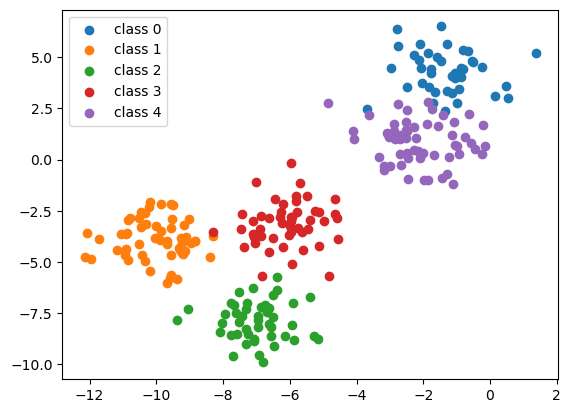

In [10]:
for i in range(k):
    plt.scatter(x=X_test[:,0][y_test==i], y=X_test[:,1][y_test==i], color="C{}".format(i), label="class {}".format(i))
plt.legend()

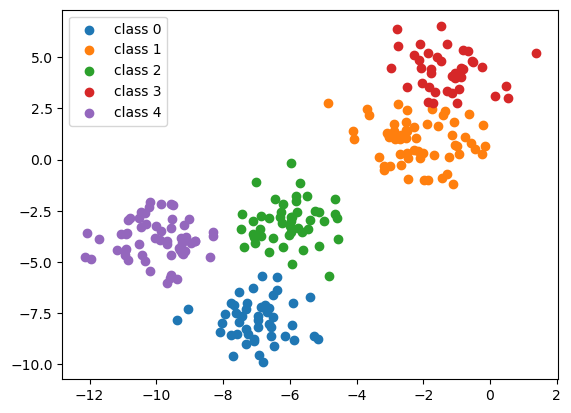

In [9]:
for i in range(k):
    plt.scatter(x=X_test[:,0][y_hat_test==i], y=X_test[:,1][y_hat_test==i], color="C{}".format(i), label="class {}".format(i))
plt.legend()

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment

def hungarian_match(y_true, y_pred):
    """
    Matches predicted cluster labels to true labels using the Hungarian algorithm.
    Returns remapped y_pred and accuracy score.
    """

    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    
    # Create a mapping from cluster -> label
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    
    # Remap y_pred
    y_pred_remapped = np.array([mapping[cluster] for cluster in y_pred])
    acc = accuracy_score(y_true, y_pred_remapped)
    
    return y_pred_remapped, acc, mapping


In [12]:


_, acc, mapping = hungarian_match(y_test, y_hat_test)

print("Mapping (cluster -> label):", mapping)
print("Accuracy:", acc)

Mapping (cluster -> label): {3: 0, 4: 1, 0: 2, 2: 3, 1: 4}
Accuracy: 0.98
